In [39]:
!pip install matplotlib

     |████████████████████████████████| 12.4 MB 20 kB/s eta 0:00:011    |███▋                            | 1.4 MB 91 kB/s eta 0:02:01     |██████▋                         | 2.5 MB 93 kB/s eta 0:01:46     |████████                        | 3.1 MB 49 kB/s eta 0:03:10     |██████████████▌                 | 5.6 MB 115 kB/s eta 0:00:59     |██████████████▉                 | 5.8 MB 110 kB/s eta 0:01:00     |████████████████▋               | 6.4 MB 274 kB/s eta 0:00:22     |█████████████████▌              | 6.8 MB 225 kB/s eta 0:00:26     |████████████████████            | 7.7 MB 261 kB/s eta 0:00:18     |█████████████████████████▌      | 9.9 MB 59 kB/s eta 0:00:43     |███████████████████████████████▎| 12.1 MB 62 kB/s eta 0:00:05
     |████████████████████████████████| 88 kB 684 kB/s eta 0:00:01
     |████████████████████████████████| 67 kB 167 kB/s eta 0:00:011


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
Test = pd.read_csv('./Justice.csv').drop(['Time'],axis = 1)

In [159]:
Test['T'].head(20)

0       同意
1       普通
2       同意
3       普通
4     非常同意
5       普通
6       同意
7       同意
8       普通
9       同意
10      同意
11      同意
12      普通
13      普通
14      同意
15      普通
16      普通
17      同意
18      同意
19      同意
Name: T, dtype: object

In [160]:
Test.columns

Index(['Sex', 'Age', 'eduation', 'Job', 'stage', 'Money', 'Target', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC',
       'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK'],
      dtype='object')

# 整理資料

In [165]:
Test['Sex'] = Test.Sex.replace('女',0).replace('男',1)
Test['Age'] = Test.Age.replace('16~20歲',0).replace('21~30歲',1).replace('31~40歲',2).replace('41~50歲',3).replace('51歲以上',4)

Test['eduation'] = Test.eduation.replace('國中以下',0).replace('高中(職)',1).replace('大專院校',2)\
                    .replace('大學',3).replace('碩士以上',4)

Test['Job'] = Test.Job.replace('軍公教',0).replace('製造業',1).replace('醫事人員','服務業').replace('運輸駕駛員','服務業').replace('服務業',2).replace('資訊',3)\
                    .replace('金融業',4).replace('出版','大眾傳播業').replace('大眾傳播業',5).replace('退休人員','自由業')\
                    .replace('設計相關','自由業').replace('自由業',6).replace('學生',7)

Test['stage'] = Test.stage.replace('全職',0).replace('打工','兼職').replace('兼職',1).replace('實習',2).replace('已退休','待業').replace('不存在','待業').replace('待業',3).replace('工讀','全職學生').replace('全職學生',4)

Test['Money'] = Test.Money.replace('20000元以下',0).replace('20001~30000元',1).replace('30001~40000元',2)\
                    .replace('40001~50000元',3).replace('50001元以上',4)

Test['Target'] = Test.Target.replace('否',0).replace('是',1)

Test['A']= Test.A.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['B']= Test.B.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['C']= Test.C.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['D']= Test.D.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['E']= Test.E.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['F']= Test.F.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['G']= Test.G.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['H']= Test.H.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['I']= Test.I.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['J']= Test.J.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['K']= Test.K.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['L']= Test.L.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['M']= Test.M.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['N']= Test.N.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['O']= Test.O.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['P']= Test.P.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['Q']= Test.Q.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['R']= Test.R.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['S']= Test.S.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
# Test['T']= Test.T.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['U']= Test.U.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['V']= Test.V.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['W']= Test.W.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['X']= Test.X.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['Y']= Test.Y.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['Z']= Test.Z.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AA']= Test.AA.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AB']= Test.AB.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AC']= Test.AC.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AD']= Test.AD.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AE']= Test.AE.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AF']= Test.AF.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AG']= Test.AG.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AH']= Test.AH.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AI']= Test.AI.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AJ']= Test.AJ.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)
Test['AK']= Test.AK.replace('非常同意',2).replace('同意',1).replace('普通',0).replace('不同意',-1).replace('非常不同意',-2)


In [167]:
Test = Test.drop(['T'],axis = 1)  # <----這欄有問題，所以刪掉

#  交叉表

In [180]:
Test.pivot_table(values=['Sex','Age'],index=['AK'],columns='Target')

Age                 Sex          
Target         0         1         0         1
AK                                            
-2      1.000000  0.333333  1.000000  0.000000
-1      1.375000  0.545455  0.625000  0.090909
 0      0.897959  0.796610  0.448980  0.237288
 1      0.738095  1.088000  0.369048  0.336000
 2      0.608696  0.903226  0.217391  0.516129

# 隨機森林

In [175]:
X = Test.drop(['Target','Sex',
 'Age',
 'eduation',
 'Job',
 'stage',
 'Money','U', 'V', 'W', 'X', 'Y',
       'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK','C','S','K'],axis =1).values
y = Test['Target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #測試資料比例

rfc=RandomForestClassifier(n_estimators = 800,n_jobs = -1,random_state =2, min_samples_leaf = 50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [176]:
y_predict=rfc.predict(X_test)
# y_predict
rfc.score(X_test,y_test)

0.6890756302521008

In [177]:
imp=rfc.feature_importances_
imp

array([0.12797128, 0.06270704, 0.04199904, 0.11064396, 0.20505579,
       0.06613845, 0.05696788, 0.01806842, 0.01004137, 0.02619991,
       0.00495938, 0.01201965, 0.01816225, 0.01877141, 0.00777738,
       0.02051781, 0.01680928, 0.097566  , 0.02808733, 0.04953638])

In [178]:
names=[i for i in Test.drop(['Target','Sex','Age',
 'eduation',
 'Job',
 'stage',
 'Money', 'U', 'V', 'W', 'X', 'Y',
       'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK','C','S','K'],axis =1).columns]
names

['A',
 'B',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'Z',
 'AA',
 'AB',
 'AC']

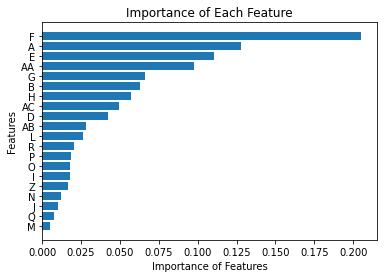

In [179]:
zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()